<img src="http://cdn3.gnarususercontent.com.br/3678-data-science-trabalhando-cientista-dados/Imagens%20das%20atividades/Aula1-img0.jpg" />
<img src="http://cdn3.gnarususercontent.com.br/3678-data-science-trabalhando-cientista-dados/Imagens%20das%20atividades/Sem%20t%C3%ADtulo.jpg" />

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

In [4]:
# Normalizando e arrumando dados https://pandas.pydata.org/docs/user_guide/missing_data.html

df['temperatura'] = df['temperatura'].interpolate(method='linear') # arruma os NaN, colocando um valor linear entre os valores conhecidos, 2,00 NaN 3,00 - 2,00 2,50 3,00
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [5]:
# lines_duplicated = df.duplicated()
df_normalizado = df.drop_duplicates() # remove linhas duplicadas

In [6]:
df_normalizado.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


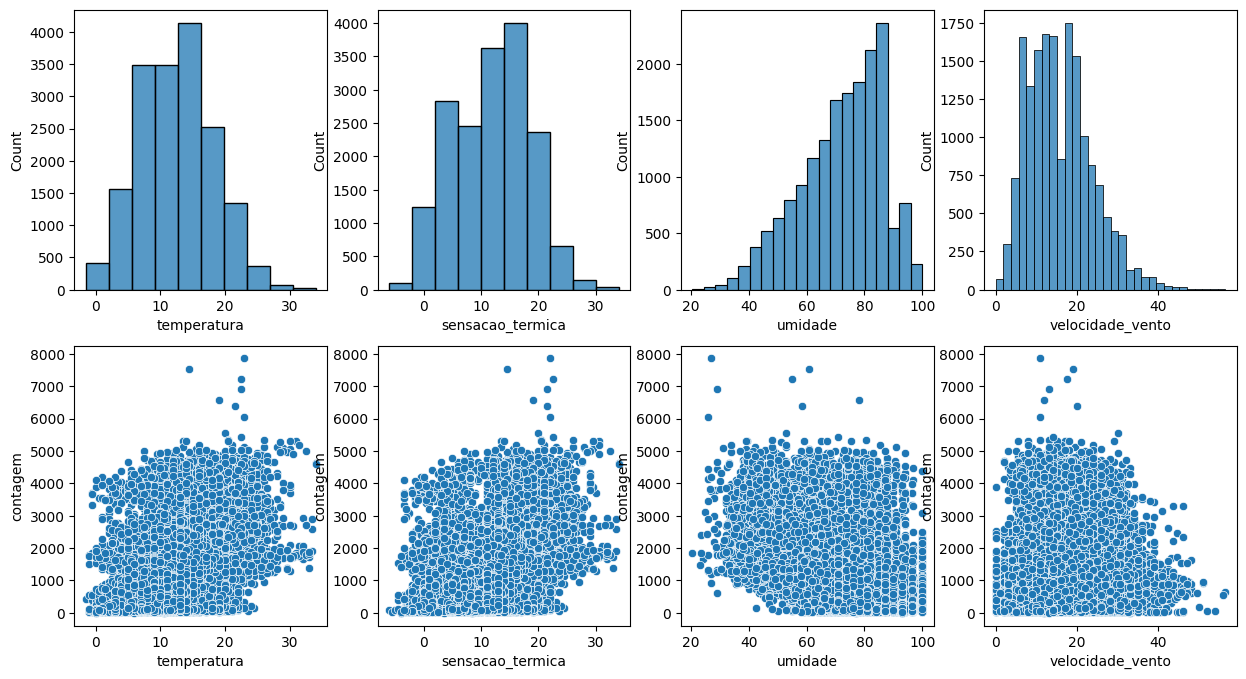

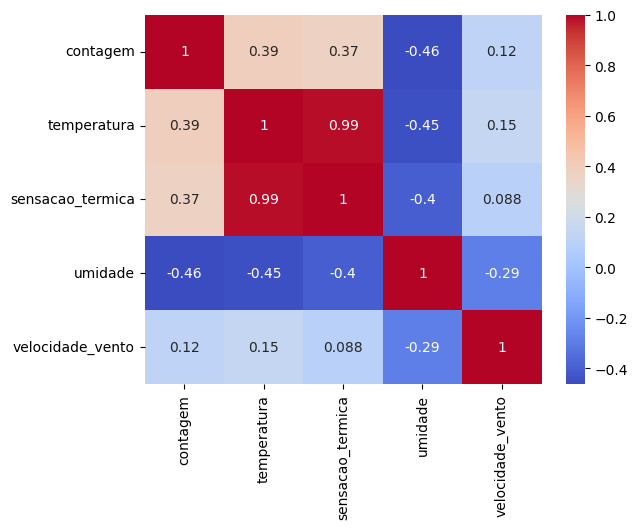

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

sns.histplot(ax=axes[0, 0], data= df_normalizado, x='temperatura', bins=10) # bins = quantidade de barras
sns.histplot(ax=axes[0, 1], data= df_normalizado, x='sensacao_termica', bins=10)
sns.histplot(ax=axes[0, 2], data= df_normalizado, x='umidade', bins=20)
sns.histplot(ax=axes[0, 3], data= df_normalizado, x='velocidade_vento', bins=30)

sns.scatterplot(ax=axes[1, 0], data= df_normalizado, x='temperatura', y='contagem') # contagem = bicicletas_alugadas
sns.scatterplot(ax=axes[1, 1], data= df_normalizado, x='sensacao_termica', y='contagem')
sns.scatterplot(ax=axes[1, 2], data= df_normalizado, x='umidade', y='contagem')
sns.scatterplot(ax=axes[1, 3], data= df_normalizado, x='velocidade_vento', y='contagem')

plt.show()

sns.heatmap(df_normalizado.corr(numeric_only=True), annot=True, cmap='coolwarm') # correlação entre as variáveis

plt.show()



In [8]:
df_normalizado.describe(include=[object]) # mostra as variáveis categóricas

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


estacao: ['Inverno' 'Primavera' 'Verão' 'Outono']
clima: ['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']


C:\Users\dayon\AppData\Local\Temp\ipykernel_3988\3804196945.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_normalizado.groupby('estacao').sum().sort_values("contagem", ascending=False), x='estacao', y='contagem', ax=aux[0], palette={'Verão': 'orange', 'Inverno': 'blue', 'Outono': 'yellow', 'Primavera':'green'}) # barplot = gráfico de barras


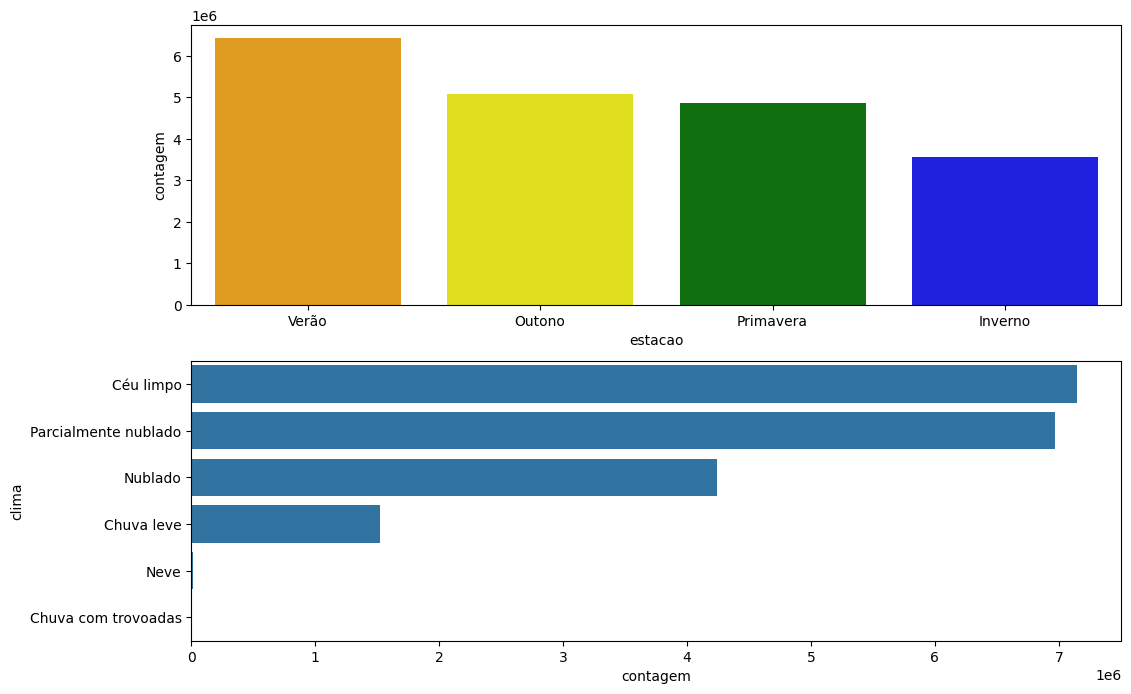

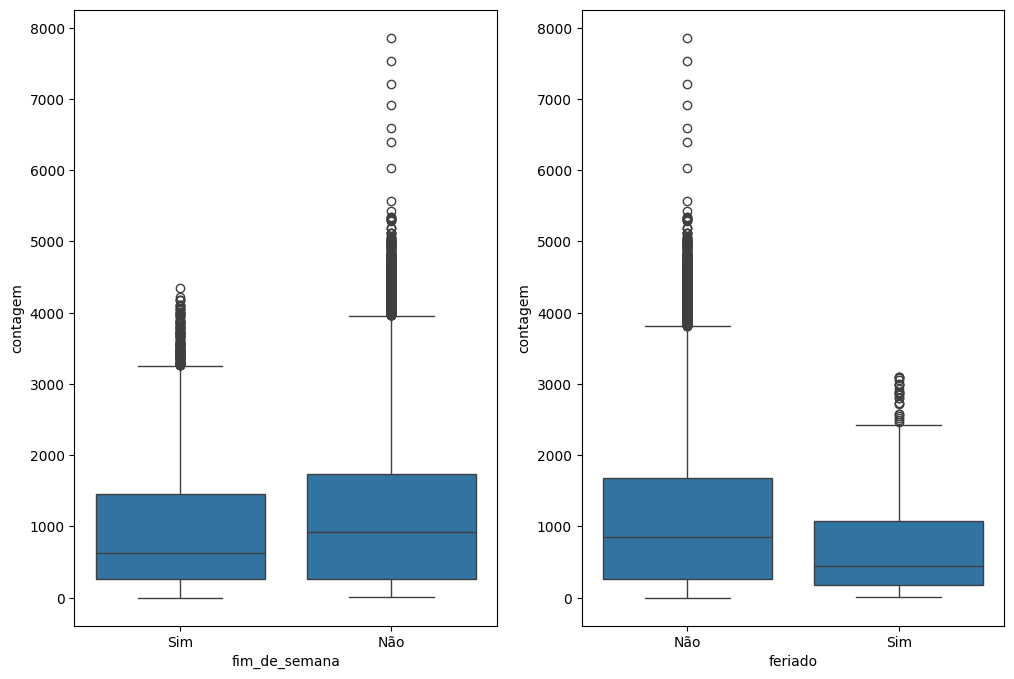

In [30]:
#for col in df_normalizado.select_dtypes(include=[object]).columns: # mostra os valores únicos das variáveis categóricas
for col in ['estacao', 'clima']: 
    print(f'{col}: {df_normalizado[col].unique()}')
    
    
fig, aux = plt.subplots(2, 1, figsize=(12, 8))
    
sns.barplot(data=df_normalizado.groupby('estacao').sum().sort_values("contagem", ascending=False), x='estacao', y='contagem', ax=aux[0], palette={'Verão': 'orange', 'Inverno': 'blue', 'Outono': 'yellow', 'Primavera':'green'}) # barplot = gráfico de barras
sns.barplot(data=df_normalizado.groupby('clima').sum().sort_values("contagem", ascending=False), x='contagem', y='clima', ax=aux[1], orient='h')

plt.show()

fig, aux2 = plt.subplots(1, 2, figsize=(12, 8))
sns.boxplot(data=df_normalizado, x='fim_de_semana', y='contagem', ax=aux2[0]) # boxplot = gráfico de caixa
sns.boxplot(data=df_normalizado, x='feriado', y='contagem', ax=aux2[1])


plt.show()

<Axes: xlabel='hora', ylabel='contagem'>

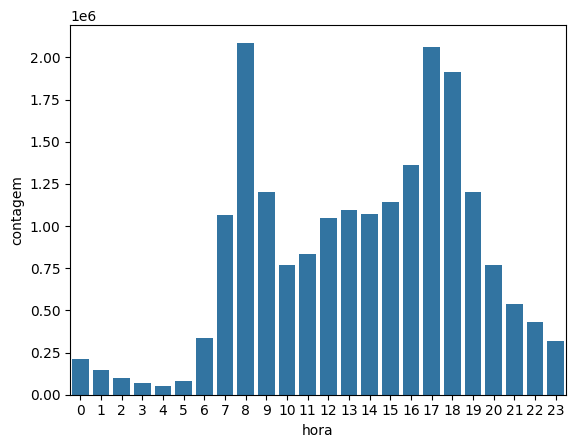

In [10]:
df_pie = pd.concat([pd.to_datetime(df_normalizado['data_hora']).dt.hour, df_normalizado['contagem']], axis=1)
df_pie.columns = ['hora', 'contagem']
df_pie = df_pie.groupby('hora').sum().reset_index()
df_pie = df_pie.set_index('hora')

sns.barplot(df_pie, x=df_pie.index, y='contagem') # era para ser um gráfico de pizza, mas não ficou bom kkkk

In [11]:
mediana_feriado = df_normalizado.groupby('feriado')['contagem'].median()
mediana_fim_semana = df_normalizado.groupby('fim_de_semana')['contagem'].median()

print(f'Mediana de aluguel em feriado: {mediana_feriado}, da para concluir que tem menos alugueis em dias de feriado\n')
print(f'Mediana de aluguel em fim de semana: {mediana_fim_semana}')

Mediana de aluguel em feriado: feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64, da para concluir que tem menos alugueis em dias de feriado

Mediana de aluguel em fim de semana: fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64


In [ ]:
from scipy.stats import mannwhitneyu
# H0: As distribuições de alugueis de bikes na primavera e outono sao iguais são iguais
# H1: As distribuições de alugueis de bikes na primavera e outono sao diferentes

primavera = df_normalizado.query('estacao == "Primavera"')['contagem']
outono = df_normalizado.query('estacao == "Outono"')['contagem']

stat, p = mannwhitneyu(primavera, outono, alternative='two-sided')

print(f'stat: {stat}')
print(f'p-value: {p}')

if p < 0.05: # 0.05 é o valor de alpha, se p for menor que alpha, rejeita H0
    print('Rejeita H0, Aceita H1, ou seja, as distribuições de alugueis de bikes na primavera e outono sao diferentes')
else:
    print('Aceita H0, Rejeita H1, ou seja, as distribuições de alugueis de bikes na primavera e outono sao iguais')

stat: 9044682.5
p-value: 0.0004762100221646297
Rejeita H0, Aceita H1, ou seja, as distribuições de alugueis de bikes na primavera e outono sao diferentes


<Axes: xlabel='data', ylabel='contagem'>

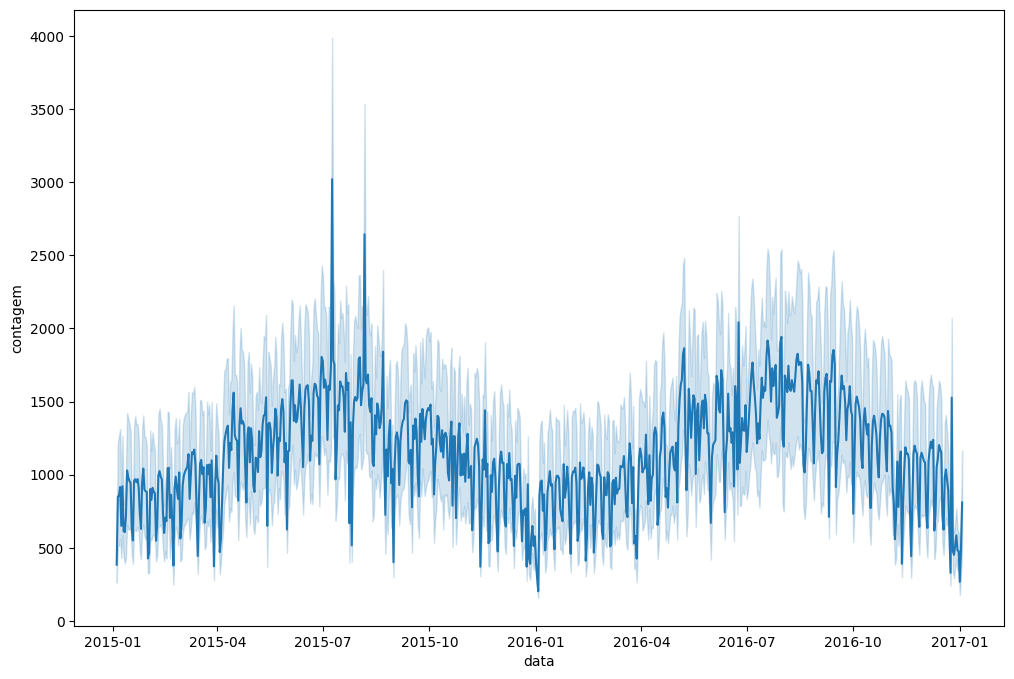

In [ ]:
df_datas = df_normalizado.groupby('data_hora').sum().reset_index()
df_datas['mes'] = pd.to_datetime(df_datas['data_hora']).dt.month
df_datas['dia'] = pd.to_datetime(df_datas['data_hora']).dt.day
df_datas['data'] = pd.to_datetime(df_datas['data_hora']).dt.date

# for mes in df_datas['mes'].unique(): # por mes
#     sns.lineplot(data=df_datas.query(f'mes == {mes}'), x='dia', y='contagem')
#     plt.title(f'Alugueis de bikes no mês {mes}')
#     plt.show()

plt.figure(figsize=(12, 8))

sns.lineplot(data=df_datas, x='data', y='contagem')

In [60]:
from prophet import Prophet
import numpy as np

In [133]:
df_prophet = df_datas[['data', 'contagem']].rename(columns={'data': 'ds', 'contagem': 'y'})
df_prophet.head()

df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

seed = np.random.seed(12345)

model = Prophet()

model.fit(df_prophet)

df_future = model.make_future_dataframe(periods=90, freq='D')

predict = model.predict(df_future)


18:33:44 - cmdstanpy - INFO - Chain [1] start processing
18:33:44 - cmdstanpy - INFO - Chain [1] done processing


In [134]:
df_treino = pd.DataFrame()

# Separando 80% dos dados para treino
df_treino['ds'] = df_prophet['ds'][:584] #
df_treino['y'] = df_prophet['y'][:584]

df_teste = pd.DataFrame()

# Separando 20% dos dados para teste
df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]


In [135]:
np.random.seed(12345)

modelo = Prophet()

modelo.fit(df_treino)

futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)


18:33:49 - cmdstanpy - INFO - Chain [1] start processing
18:33:49 - cmdstanpy - INFO - Chain [1] done processing


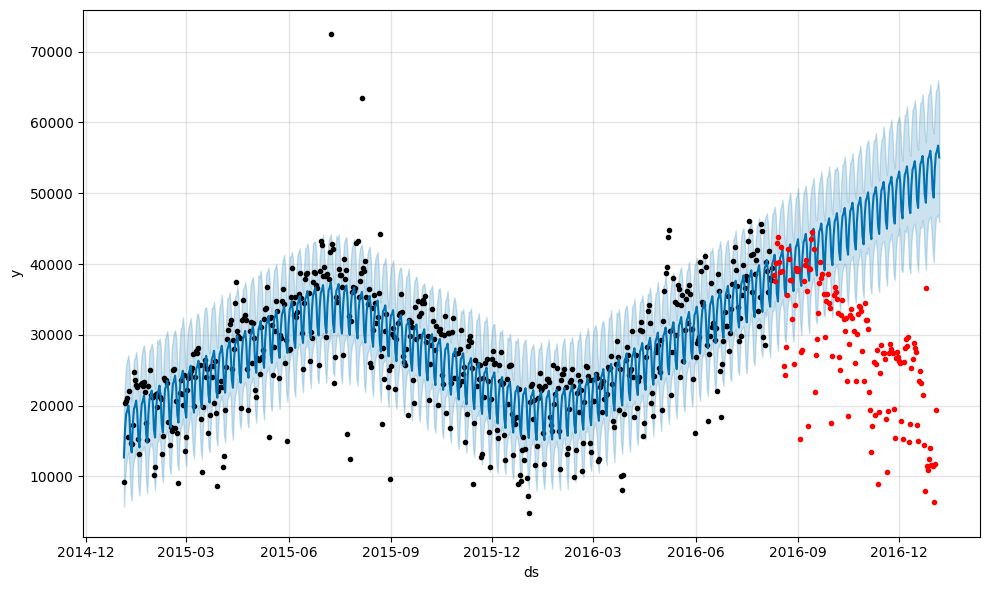

In [136]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [137]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

ValueError: You are trying to merge on datetime64[ns] and object columns for key 'ds'. If you wish to proceed you should use pd.concat

In [ ]:
from sklearn.metrics import mean_absolute_error

mse = mean_absolute_error(df_conparacao['y'], df_conparacao['yhat'])

print(f'MSE: {mse}')
print(f'RAIZ MSE: {np.sqrt(mse)}')

          ds          yhat
0 2015-01-04  12688.589118
1 2015-01-05  16671.037142
2 2015-01-06  18828.589157
3 2015-01-07  19281.502700
4 2015-01-08  20017.404819


KeyError: 'y'